In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [67]:
colors = ['#F7941D', '#00b9f2', '#00a875', '#ecde38']
sex = ['#0072bc', '#da6fab']
sns.set_palette(sns.color_palette(colors))

In [68]:
df=pd.read_csv('../summary_data/data_hashimotos.csv')
df=df.loc[df['type'] != 'focal']
df.head()

,submitted_subject_id_s,n_cdr3_IGH,flag,note,type
0,GTEX-YFC4,5621,1,late stage hashimotos,hashimotos
1,GTEX-14BMU,5260,1,diff hashimotos,hashimotos
2,GTEX-11XUK,4435,1,mod degree of hashimotos,hashimotos
3,GTEX-S4UY,3581,1,diff hashimotos,hashimotos
4,GTEX-144FL,3540,1,? autolysis,hashimotos


# Figure 6a

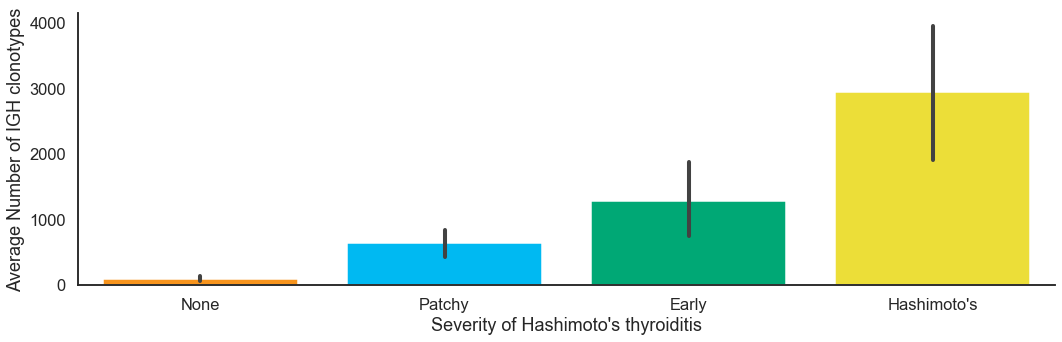

In [90]:
plt.figure(figsize=(17.5,5))
sns.set_style("white")
sns.set_context("talk")
g=sns.barplot(x="type", y="n_cdr3_IGH",data = df,#kind='bar',height=5,aspect=3.5,
              order=['None','patchy','early',' hashimotos'], saturation=1, estimator=np.mean, ci=95)

g.set(xlabel='Severity of Hashimoto\'s thyroiditis', ylabel='Average Number of IGH clonotypes')
g.set_xticklabels(labels=['None', 'Patchy', 'Early', 'Hashimoto\'s'])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim(-1, 1)
g=sns.despine()
plt.savefig("../figures/Figure6_a.pdf", bbox_inches='tight')
plt.savefig("../figures/Figure6_a.png", bbox_inches='tight')

In [70]:
df.groupby(['type']).count()

,submitted_subject_id_s,n_cdr3_IGH,flag,note
type,,,,
hashimotos,11,11,11,11
None,180,180,180,180
early,7,7,7,7
patchy,6,6,6,6


In [85]:
print (stats.kruskal(df.loc[df['type'] == 'None']['n_cdr3_IGH'],df.loc[df['type'] == 'patchy']['n_cdr3_IGH']))
print (stats.kruskal(df.loc[df['type'] == 'None']['n_cdr3_IGH'],df.loc[df['type'] == 'early']['n_cdr3_IGH']))
print (stats.kruskal(df.loc[df['type'] == 'None']['n_cdr3_IGH'],df.loc[df['type'] == ' hashimotos']['n_cdr3_IGH']))




print ("---")
print (stats.kruskal(df.loc[df['type'] == 'patchy']['n_cdr3_IGH'],df.loc[df['type'] == 'early']['n_cdr3_IGH']))
print (stats.kruskal(df.loc[df['type'] == 'patchy']['n_cdr3_IGH'],df.loc[df['type'] == ' hashimotos']['n_cdr3_IGH']))

print ("---")
print (stats.kruskal(df.loc[df['type'] == 'early']['n_cdr3_IGH'],df.loc[df['type'] == ' hashimotos']['n_cdr3_IGH']))


KruskalResult(statistic=14.986705449266331, pvalue=0.00010827127560951228)
KruskalResult(statistic=17.82949242678576, pvalue=2.4160915414684497e-05)
KruskalResult(statistic=30.464310755257724, pvalue=3.400654097742428e-08)
---
KruskalResult(statistic=2.9387755102040813, pvalue=0.08647626549366551)
KruskalResult(statistic=11.0, pvalue=0.0009111188771537126)
---
KruskalResult(statistic=4.923444976076553, pvalue=0.026494636154589343)


In [72]:
all_samples = pd.read_csv('../summary_data/perSample_allChains_aditionalPhenotypes.csv')
all_samples = all_samples.rename(columns={' nCDR3_IGH': 'nCDR3_IGH'})
all_samples.head()

,File_Name,tissue,histological site,nCDR3_IGH,nReads_IGH,Shanon_IGH,sample_x,tissue.1,histological site.1,nCDR3_IGK,...,Platform_s,SRA_Study_s,g1k_analysis_group_s,g1k_pop_code_s,gap_accession_s,gap_consent_code_s,source_s,study_design_s,study_name_s,submitter_handle_s
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,1,0.086406,-0.000000,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,6,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
1,G64389.GTEX-13SLW-0326.1,Muscle - Skeletal,Muscle,1,0.072324,-0.000000,G64389.GTEX-13SLW-0326.1,Muscle - Skeletal,Muscle,8,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
2,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,637,29.723199,6.270457,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,844,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
3,G18060.GTEX-OXRK-0526-SM-2YUMW.1,Artery - Tibial,Blood Vessel,0,0.000000,0.000000,G18060.GTEX-OXRK-0526-SM-2YUMW.1,Artery - Tibial,Blood Vessel,0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
4,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,Brain - Caudate (basal ganglia),Brain,0,0.000000,0.000000,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,Brain - Caudate (basal ganglia),Brain,3,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx


In [73]:
fm_df = all_samples.loc[all_samples['histological site'] == 'Breast',['histological site', 'nCDR3_IGH', 'sex_s']].reindex()
fm_group = fm_df.groupby(by='sex_s')['nCDR3_IGH'].count()
fm_group

sex_s
female    55
male      73
Name: nCDR3_IGH, dtype: int64

# Figure 6b

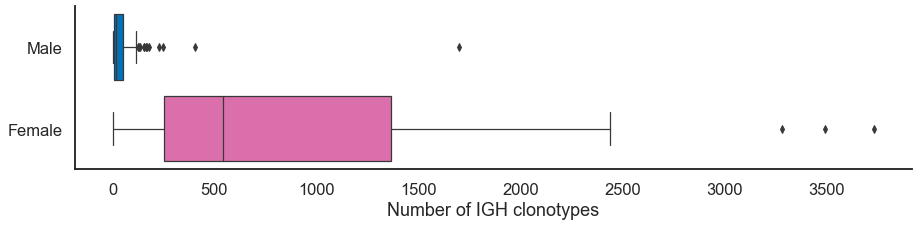

In [76]:
plt.figure(figsize=(15,3))
sns.set_style("white")
sns.set_context("talk")
g=sns.boxplot(x="nCDR3_IGH", y="sex_s",data = fm_df, order=['male', 'female'], saturation=1, palette=sex, 
              linewidth=1.25)
g.set(xlabel='Number of IGH clonotypes', ylabel='')
g.set_yticklabels(labels=['Male', 'Female'])

sns.despine()
plt.savefig("../figures/Figure6_b.pdf", bbox_inches='tight')
plt.savefig("../figures/Figure6_b.png", bbox_inches='tight')